# Notebook for measuring the MIR of llava based models.

TODO: Add ability to measure other model's MIR

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
os.environ["HF_HOME"] = "~/huggingface"

import torch
print([torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())])

['NVIDIA RTX A6000']


## Download the pretrained projector here

In [2]:
from huggingface_hub import hf_hub_download

import torch

projector_path = hf_hub_download(
    repo_id="liuhaotian/llava-v1.5-mlp2x-336px-pretrain-vicuna-7b-v1.5",
    filename="mm_projector.bin"
)

# Load the projector weights
projector_state_dict = torch.load(projector_path)
# print(projector_state_dict.keys())

# print(projector_state_dict['model.mm_projector.0.weight'].shape)
# print(projector_state_dict['model.mm_projector.2.weight'].shape)

#model.lm_head.load_state_dict(projector_state_dict)

dict_keys(['model.mm_projector.0.weight', 'model.mm_projector.0.bias', 'model.mm_projector.2.weight', 'model.mm_projector.2.bias'])
torch.Size([4096, 1024])
torch.Size([4096, 4096])


/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## This loads the pretrained model with the base vincuna LLM and and passes in the loaded projector weights directly

In [4]:
from llava.model.builder import load_pretrained_model_paper, load_pretrained_model_no_tokenizer
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model
import tqdm as notebook_tqdm
from transformers import AutoProcessor, AutoModelForCausalLM, AutoTokenizer
from llava.model import *
from peft import PeftModel



model_path = "liuhaotian/llava-v1.5-mlp2x-336px-pretrain-vicuna-7b-v1.5"
model_base = "lmsys/vicuna-7b-v1.5"

tokenizer, model, image_processor, fcontext_len = load_pretrained_model_paper(
    model_path=model_path,
    model_base="lmsys/vicuna-7b-v1.5",
    model_name=get_model_name_from_path(model_path),
    projector_state_dict=projector_state_dict
)
#print(getattr(model.config, "image_aspect_ratio", None))

# fmodel = LlavaLlamaForCausalLM.from_pretrained(model_path)

# base_model = LlavaLlamaForCausalLM.from_pretrained("liuhaotian/llava-v1.5-7b")
# tokenizer = AutoTokenizer.from_pretrained("liuhaotian/llava-v1.5-7b")
# #processor = AutoProcessor.from_pretrained("liuhaotian/llava-v1.5-7b-lora")
# # Load the LoRA weights if using a lora model
#fmodel = PeftModel.from_pretrained(model, "liuhaotian/llava-v1.5-13b-lora")

# Ensure the model is in evaluation mode if needed
model.eval()

# model = LlavaLlamaForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)
# image_processor = AutoProcessor.from_pretrained(model_path)

# ftokenizer, fmodel, fimage_processor, context_len = load_pretrained_model(
#     model_path=model_path,
#     model_base=None,
#     model_name=get_model_name_from_path(model_path)
# )

#print(tokenizer)
# print(fimage_processor)

# Check if some of the weights are nans if you want
# layer_name = "model.vision_tower.vision_tower.vision_model.encoder.layers.10.self_attn.q_proj.weight"  # Adjust this based on your model structure
# print("Selected layer weights:", model.state_dict()[layer_name][:5, :5])
# if torch.isnan(model.state_dict()[layer_name][:5, :5]).any():
#     print("nans exist")
# else:
#     print("no nans")


Loading LLaVA from base model...


/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


LlavaMetaModel init ran
Type of mm proj: <class 'torch.nn.modules.container.Sequential'>


Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]
Some weights of LlavaLlamaForCausalLM were not initialized from the model checkpoint at lmsys/vicuna-7b-v1.5 and are newly initialized: ['model.mm_projector.2.bias', 'model.mm_projector.2.weight', 'model.mm_projector.0.weight', 'model.mm_projector.0.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-

Model base: lmsys/vicuna-7b-v1.5
Device map: auto
Loading vision tower
Done loading vision tower


LlavaLlamaForCausalLM(
  (model): LlavaLlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaR

Load in the data from the MIR repo

In [3]:
print(getattr(model.config, "image_aspect_ratio", None))

anyres


003a8ae2ef43b901.jpg
Number of questions: 5000
Number of images: 5000


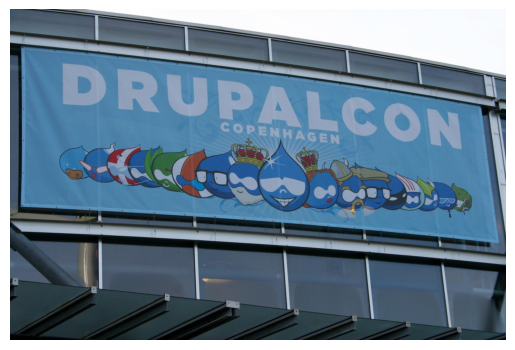

In [5]:
import json
from PIL import Image
import matplotlib.pyplot as plt

def read_story_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    parts = content.split('@highlight')
    story = parts[0].strip()
    highlights = [part.strip() for part in parts[1:]]
    return story, highlights


### Data ###
# text_data_path = args.text_data_path
# data_texts = os.listdir(text_data_path)

# image_base_path = args.image_data_path
# data_images = os.listdir(image_base_path)

# NOTE: You can specify your own data for evaluation
# NOTE: For example, we can use images from TextVQA val and text from CNN/DM as follows.
# # cnn/daily mail and textvqa
# text_data_path = "/mnt/hwfile/mllm/huangqidong/nlp/cnn/stories"
# data_texts = os.listdir(text_data_path)
# # TextVQA
# image_base_path = "/mnt/hwfile/mllm/chenlin/llava/data/eval/textvqa/train_images/"
# question_file = "./playground/data/eval/textvqa/llava_textvqa_val_v051_ocr.jsonl"
# questions = [json.loads(q) for q in open(os.path.expanduser(question_file), "r")]
# data_images = [questions[i]["image"] for i in range(len(questions))]
text_data_path = "/home/spencers/multimodal/MIR_data/cnn/stories"
data_texts = os.listdir(text_data_path)

question_file = "/home/spencers/multimodal/MIR_data/TextVQA_0.5.1_val.json"
questions = [json.loads(q) for q in open(os.path.expanduser(question_file), "r")]
questions = [x for x in questions[0]['data']] #Added this line myself for proper reading of input file --Spencer
# print(data_texts[0])

data_images = [questions[i]["image_id"] + ".jpg" for i in range(len(questions))] # --modified this too Spencer

# print(data_images[0])

caption = read_story_file(os.path.join(text_data_path, data_texts[0]))[0]

#captions = [questions[i]["question"] for i in range(len(questions))]
#print(captions[1])
print(data_images[0])

# print(caption)

print(f"Number of questions: {len(questions)}")
print(f"Number of images: {len(data_images)}")

image_base_path = "/home/spencers/multimodal/MIR_data/train_images/"

image = Image.open("/home/spencers/multimodal/MIR_data/train_images/" + data_images[1])

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hide the axes
plt.show()

Run eval_model2, the modified function that computes MIR since mir.py had issues

In [6]:
model_path = "gordonhu/MQT-LLaVA-7b"
prompt = "What does the text say?"
image_file = "/home/spencers/multimodal/Jailbreak-In-Pieces/images/white.jpeg"
from llava.eval.run_llava import eval_model2

args = type('Args', (), {
    "model_path": model_path, #not used, directly passed into eval2
    "model_base": None,
    "model_name": get_model_name_from_path(model_path),
    "query": prompt, #not used, directly passed into eval2
    "conv_mode": None,
    "image_file": image_file, #not used, directly passed into eval2
    "sep": ",",
    "temperature": 0,
    "top_p": None,
    "num_beams": 1,
    "max_new_tokens": 512,
    "eval_num": 100
})()

# eval_model2(args, tokenizer, model, image_processor, data_images, data_texts, text_data_path, image_base_path)
eval_model2(args, tokenizer, model, image_processor, data_images, data_texts, text_data_path, image_base_path)



--------------Prompt: A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him.

Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix"

To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties.

"I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant.

"The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs."

At 

/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/spencers/miniconda3/envs/mqt-llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
LlamaModel is using LlamaSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument 

<class 'transformers.generation.utils.GreedySearchDecoderOnlyOutput'>
<s> The
Latent hidden states:
33
tensor([[ 0.2354, -0.9839,  0.0759,  ..., -0.3774, -0.2271, -0.0997],
        [-0.0518,  0.1937, -0.1517,  ...,  0.1697,  0.1036, -0.0277],
        [ 0.1210, -0.0709, -0.0441,  ..., -0.0295,  0.0171, -0.0893],
        ...,
        [ 0.1665, -0.0572,  0.0231,  ..., -0.0199, -0.0508, -0.0720],
        [ 0.0513,  0.0662,  0.0144,  ..., -0.0269, -0.1284, -0.0759],
        [ 0.0467,  0.0577,  0.0774,  ...,  0.0330,  0.0179,  0.0504]],
       device='cuda:0', dtype=torch.float16)


--------------Prompt: A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inm